<a href="https://colab.research.google.com/github/anwesha2004-bot/cuddly-fortnight/blob/main/Heart_Disease_Detetction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense

In [ ]:
data = pd.read_csv("/content/heart_failure_clinical_records_dataset 2.csv")

In [ ]:
data

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


In [ ]:
data.tail()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
294,62.0,0,61,1,38,1,155000.0,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.0,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.0,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.0,1.4,140,1,1,280,0
298,50.0,0,196,0,45,0,395000.0,1.6,136,1,1,285,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [ ]:
data.isnull().sum()

,0
age,0
anaemia,0
creatinine_phosphokinase,0
diabetes,0
ejection_fraction,0
high_blood_pressure,0
platelets,0
serum_creatinine,0
serum_sodium,0
sex,0


In [ ]:
data.shape

(299, 13)

In [ ]:
# data[12].value_counts()

In [ ]:
data.rename(columns = {'DEATH_EVENT' :'class'}, inplace = True)

In [ ]:
data['class'].value_counts()

,count
class,
0,203
1,96


In [ ]:
X = data.drop(columns = 'class', axis=1)
Y = data['class']

In [ ]:
print(X)

      age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
0    75.0        0                       582         0                 20   
1    55.0        0                      7861         0                 38   
2    65.0        0                       146         0                 20   
3    50.0        1                       111         0                 20   
4    65.0        1                       160         1                 20   
..    ...      ...                       ...       ...                ...   
294  62.0        0                        61         1                 38   
295  55.0        0                      1820         0                 38   
296  45.0        0                      2060         1                 60   
297  45.0        0                      2413         0                 38   
298  50.0        0                       196         0                 45   

     high_blood_pressure  platelets  serum_creatinine  serum_sodium  sex  \

In [ ]:
# Importing the library
# import pandas as pd
from sklearn.preprocessing import StandardScaler

# define standard scaler
scaler = StandardScaler()

# transform data
X1 = scaler.fit_transform(X)

In [ ]:
X1.shape

(299, 12)

In [ ]:
print(Y)

0      1
1      1
2      1
3      1
4      1
      ..
294    0
295    0
296    0
297    0
298    0
Name: class, Length: 299, dtype: int64


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X1, Y, test_size=0.2, random_state=42)

In [ ]:
X_train.shape

(239, 12)

In [ ]:
X_train = np.array(X_train)
X_test = np.array(X_test)

In [ ]:
X_train2 = X_train.reshape(-1, X_train.shape[1],1)
X_test2 = X_test.reshape(-1, X_test.shape[1],1)

In [ ]:
# X_train1 = np.squeeze(X_train1, axis=(2, 3))
# X_test1 = np.squeeze(X_test1, axis=(2, 3))
X_train2.shape

(239, 12, 1)

In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv1D, Add, Multiply, Concatenate, AveragePooling1D, Flatten, DepthwiseConv2D
from tensorflow.keras.layers import SeparableConv1D, MaxPooling1D, Dense, GlobalAveragePooling1D
import keras

# model = Sequential()
visible = Input((12,1))
x1 = Conv1D(filters = 32, kernel_size = (1), strides = 1, activation = "relu")(visible)
m1 = Conv1D(filters = 32, kernel_size = (1), activation = "relu")(x1)
a1 = Add()([x1, m1])

x2 = Conv1D(filters = 64, kernel_size = (1), strides = 1, activation = "relu")(a1)
m2 = Conv1D(filters = 64, kernel_size = (1), activation = "relu")(x2)
a2 = Add()([x2, m2])

x3 = Conv1D(filters = 128, kernel_size = (1), strides = 1, activation = "relu")(a2)
m3 = Conv1D(filters = 128, kernel_size = (1), activation = "relu")(x3)
a3 = Add()([x3, m3])

x4 = Conv1D(filters = 256, kernel_size = (1), strides = 1, activation = "relu")(a3)
m4 = Conv1D(filters = 256, kernel_size = (1), activation = "relu")(x4)
a4 = Add()([x4, m4])

# x5 = MaxPooling1D(pool_size=2, strides=1)(a4)

# flat = Flatten()(x4)
gap = GlobalAveragePooling1D()(a4)

x = Dense(128, activation='relu')(gap)
x = Dense(90, activation='relu')(x)
x = Dense(64, activation='relu')(x)
x = Dense(32, activation='relu')(x)
output = Dense(1, activation='sigmoid')(x)


model = Model(inputs=visible, outputs=output)
opt = keras.optimizers.SGD(learning_rate=0.001,momentum=0.9)
model.compile(optimizer=opt, loss= 'binary_crossentropy', metrics=["accuracy"])

model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 12, 1)          │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d (Conv1D)           │ (None, 12, 32)         │             64 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d_1 (Conv1D)         │ (None, 12, 32)         │          1,056 │ conv1d[0][0]           │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ add (Add)                 │ (None, 12, 32)         │              0 │ conv1d[0][0],          │
│                           │                        │                │ conv1d_1[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d_2 (Conv1D)         │ (None, 12, 64)         │          2,112 │ add[0][0]              │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d_3 (Conv1D)         │ (None, 12, 64)         │          4,160 │ conv1d_2[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ add_1 (Add)               │ (None, 12, 64)         │              0 │ conv1d_2[0][0],        │
│                           │                        │                │ conv1d_3[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d_4 (Conv1D)         │ (None, 12, 128)        │          8,320 │ add_1[0][0]            │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d_5 (Conv1D)         │ (None, 12, 128)        │         16,512 │ conv1d_4[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ add_2 (Add)               │ (None, 12, 128)        │              0 │ conv1d_4[0][0],        │
│                           │                        │                │ conv1d_5[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d_6 (Conv1D)         │ (None, 12, 256)        │         33,024 │ add_2[0][0]            │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d_7 (Conv1D)         │ (None, 12, 256)        │         65,792 │ conv1d_6[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ add_3 (Add)               │ (None, 12, 256)        │              0 │ conv1d_6[0][0],        │
│                           │                        │                │ conv1d_7[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ global_average_pooling1d  │ (None, 256)            │              0 │ add_3[0][0]            │
│ (GlobalAveragePooling1D)  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense (Dense)             │ (None, 128)            │         32,896 │ global_average_poolin… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_1 (Dense)           │ (None, 90)             │         11,610 │ dense[0][0]            │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_2 (Dense)           │ (None, 64)             │          5,824 │ dense_1[0][0]          │
├──────────────────────

 Total params: 183,483 (716.73 KB)

 Trainable params: 183,483 (716.73 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Train the model
model.fit(X_train2, y_train, epochs=150, batch_size=4, validation_data=(X_test2, y_test))

Epoch 1/150
60/60 ━━━━━━━━━━━━━━━━━━━━ 7s 28ms/step - accuracy: 0.7202 - loss: 0.6706 - val_accuracy: 0.5833 - val_loss: 0.6854
Epoch 2/150
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.6631 - loss: 0.6500 - val_accuracy: 0.5833 - val_loss: 0.6958
Epoch 3/150
60/60 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - accuracy: 0.6747 - loss: 0.6384 - val_accuracy: 0.5833 - val_loss: 0.7087
Epoch 4/150
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.6991 - loss: 0.6197 - val_accuracy: 0.5833 - val_loss: 0.7097
Epoch 5/150
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7052 - loss: 0.6123 - val_accuracy: 0.5833 - val_loss: 0.7117
Epoch 6/150
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6719 - loss: 0.6393 - val_accuracy: 0.5833 - val_loss: 0.7145
Epoch 7/150
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6596 - loss: 0.6516 - val_accuracy: 0.5833 - val_loss: 0.7055
Epoch 8/150
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6737 - loss: 0.6344 - val_accuracy: 0.5833 

In [ ]:
train_acc =  model.history.history['accuracy']
val_acc = model.history.history['val_accuracy']
train_loss = model.history.history['loss']
val_loss = model.history.history['val_loss']

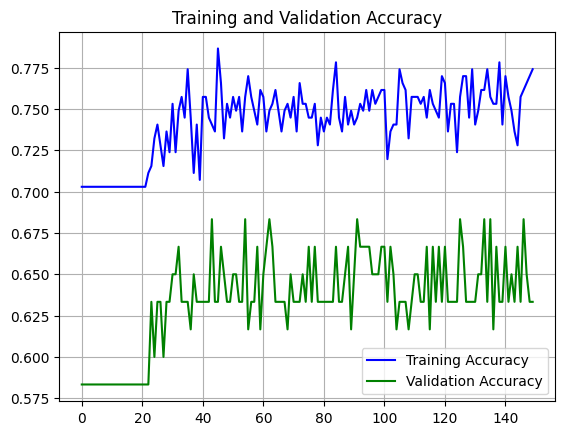

<Figure size 640x480 with 0 Axes>

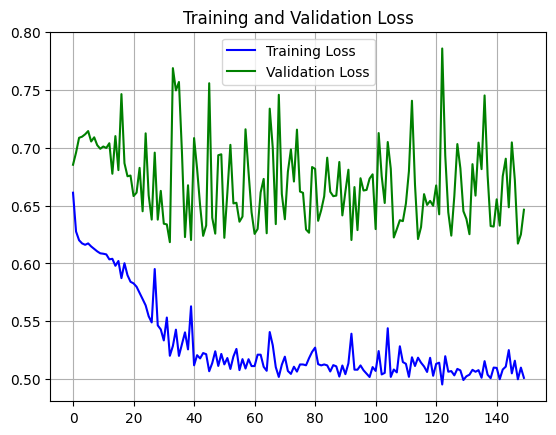

In [ ]:
from matplotlib import pyplot as plt
epochs = range(len(train_acc))
plt.plot(epochs, train_acc, 'b', label='Training Accuracy')
plt.plot(epochs, val_acc, 'g', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.grid()
plt.legend()
plt.figure()
plt.show()

plt.plot(epochs, train_loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'g', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.grid()
plt.legend()
plt.show()

In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv1D, Add, GlobalAveragePooling1D, Dense, BatchNormalization, Activation, Dropout
import tensorflow.keras.optimizers as optimizers

visible = Input((12, 1))

x = Conv1D(filters=32, kernel_size=1, activation=None)(visible)
x = BatchNormalization()(x)
x = Activation('relu')(x)

x = Conv1D(filters=32, kernel_size=1, activation=None)(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)

x = Conv1D(filters=64, kernel_size=1, activation=None)(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)

x = Conv1D(filters=64, kernel_size=1, activation=None)(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)

x = Conv1D(filters=128, kernel_size=1, activation=None)(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)

x = Conv1D(filters=128, kernel_size=1, activation=None)(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)

x = Conv1D(filters=256, kernel_size=1, activation=None)(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)

x = Conv1D(filters=256, kernel_size=1, activation=None)(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)

x = GlobalAveragePooling1D()(x)

x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)

x = Dense(90, activation='relu')(x)
x = Dropout(0.5)(x)

x = Dense(64, activation='relu')(x)
x = Dropout(0.5)(x)

x = Dense(32, activation='relu')(x)
x = Dropout(0.5)(x)

output = Dense(1, activation='sigmoid')(x)

model = Model(inputs=visible, outputs=output)
opt = optimizers.SGD(learning_rate=0.001, momentum=0.9)
model.compile(optimizer=opt, loss='binary_crossentropy', metrics=["accuracy"])

model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 12, 1)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_8 (Conv1D)                    │ (None, 12, 32)              │              64 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 12, 32)              │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 12, 32)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_9 (Conv1D)                    │ (None, 12, 32)              │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 12, 32)              │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_1 (Activation)            │ (None, 12, 32)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_10 (Conv1D)                   │ (None, 12, 64)              │           2,112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 12, 64)              │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_2 (Activation)            │ (None, 12, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_11 (Conv1D)                   │ (None, 12, 64)              │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 12, 64)              │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_3 (Activation)            │ (None, 12, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_12 (Conv1D)                   │ (None, 12, 128)             │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 12, 128)             │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_4 (Activation)            │ (None, 12, 128)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_13 (Conv1D)                   │ (None, 12, 128)             │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 12, 128)             │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 187,323 (731.73 KB)

 Trainable params: 185,403 (724.23 KB)

 Non-trainable params: 1,920 (7.50 KB)

In [ ]:
# Train the model
model.fit(X_train2, y_train, epochs=150, batch_size=4, validation_data=(X_test2, y_test))

Epoch 1/150
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.7593 - loss: 0.5605 - val_accuracy: 0.5833 - val_loss: 0.6807
Epoch 2/150
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.7149 - loss: 0.6049 - val_accuracy: 0.5833 - val_loss: 0.6828
Epoch 3/150
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.6629 - loss: 0.6252 - val_accuracy: 0.5833 - val_loss: 0.6829
Epoch 4/150
60/60 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 0.7100 - loss: 0.6005 - val_accuracy: 0.5833 - val_loss: 0.6844
Epoch 5/150
60/60 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.6796 - loss: 0.6431 - val_accuracy: 0.5833 - val_loss: 0.6816
Epoch 6/150
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.6892 - loss: 0.6345 - val_accuracy: 0.5833 - val_loss: 0.6856
Epoch 7/150
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.6883 - loss: 0.6066 - val_accuracy: 0.5833 - val_loss: 0.6850
Epoch 8/150
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.6647 - loss: 0.6294 - val_accuracy: 0.5

In [ ]:
train_acc2 =  model.history.history['accuracy']
val_acc2 = model.history.history['val_accuracy']
train_loss2 = model.history.history['loss']
val_loss2 = model.history.history['val_loss']

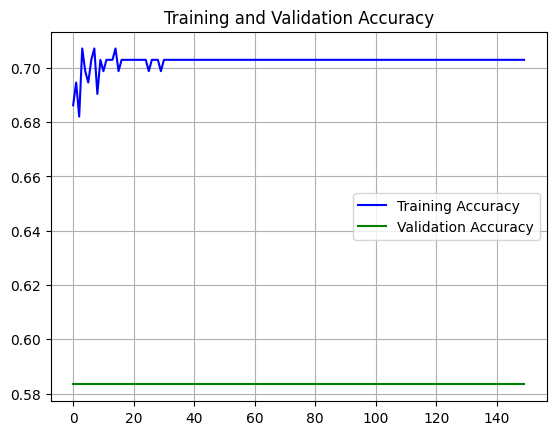

<Figure size 640x480 with 0 Axes>

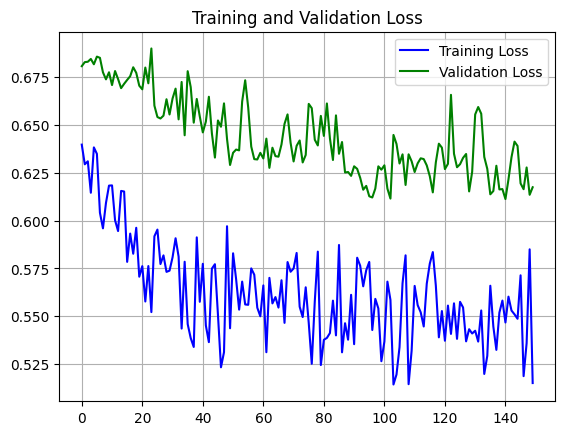

In [ ]:
from matplotlib import pyplot as plt
epochs = range(len(train_acc2))
plt.plot(epochs, train_acc2, 'b', label='Training Accuracy')
plt.plot(epochs, val_acc2, 'g', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.grid()
plt.legend()
plt.figure()
plt.show()

plt.plot(epochs, train_loss2, 'b', label='Training Loss')
plt.plot(epochs, val_loss2, 'g', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.grid()
plt.legend()
plt.show()

In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv1D, Add, Multiply, Concatenate, AveragePooling1D, Flatten, DepthwiseConv2D
from tensorflow.keras.layers import SeparableConv1D, MaxPooling1D, Dense, GlobalAveragePooling1D
import keras

# model = Sequential()
visible = Input((12,1))
x1 = Conv1D(filters = 32, kernel_size = (1), strides = 1, activation = "relu")(visible)
m1 = Conv1D(filters = 32, kernel_size = (1), activation = "relu")(x1)
a1 = Add()([x1, m1])

x2 = Conv1D(filters = 64, kernel_size = (1), strides = 1, activation = "relu")(a1)
m2 = Conv1D(filters = 64, kernel_size = (1), activation = "relu")(x2)
a2 = Add()([x2, m2])

x3 = Conv1D(filters = 128, kernel_size = (1), strides = 1, activation = "relu")(a2)
m3 = Conv1D(filters = 128, kernel_size = (1), activation = "relu")(x3)
a3 = Add()([x3, m3])

x4 = Conv1D(filters = 256, kernel_size = (1), strides = 1, activation = "relu")(a3)
m4 = Conv1D(filters = 256, kernel_size = (1), activation = "relu")(x4)
a4 = Add()([x4, m4])

x5 = MaxPooling1D(pool_size=2, strides=1)(a4)

flat = Flatten()(x4)
gap = GlobalAveragePooling1D()(x5)

x = Dense(128, activation='relu')(gap)
x = Dense(90, activation='relu')(x)
x = Dense(64, activation='relu')(x)
x = Dense(32, activation='relu')(x)
output = Dense(1, activation='sigmoid')(x)


model = Model(inputs=visible, outputs=output)
opt = keras.optimizers.SGD(learning_rate=0.001,momentum=0.9)
model.compile(optimizer=opt, loss= 'binary_crossentropy', metrics=["accuracy"])

model.summary()

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_3             │ (None, 12, 1)          │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d_24 (Conv1D)        │ (None, 12, 32)         │             64 │ input_layer_3[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d_25 (Conv1D)        │ (None, 12, 32)         │          1,056 │ conv1d_24[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ add_8 (Add)               │ (None, 12, 32)         │              0 │ conv1d_24[0][0],       │
│                           │                        │                │ conv1d_25[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d_26 (Conv1D)        │ (None, 12, 64)         │          2,112 │ add_8[0][0]            │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d_27 (Conv1D)        │ (None, 12, 64)         │          4,160 │ conv1d_26[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ add_9 (Add)               │ (None, 12, 64)         │              0 │ conv1d_26[0][0],       │
│                           │                        │                │ conv1d_27[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d_28 (Conv1D)        │ (None, 12, 128)        │          8,320 │ add_9[0][0]            │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d_29 (Conv1D)        │ (None, 12, 128)        │         16,512 │ conv1d_28[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ add_10 (Add)              │ (None, 12, 128)        │              0 │ conv1d_28[0][0],       │
│                           │                        │                │ conv1d_29[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d_30 (Conv1D)        │ (None, 12, 256)        │         33,024 │ add_10[0][0]           │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d_31 (Conv1D)        │ (None, 12, 256)        │         65,792 │ conv1d_30[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ add_11 (Add)              │ (None, 12, 256)        │              0 │ conv1d_30[0][0],       │
│                           │                        │                │ conv1d_31[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling1d_1           │ (None, 11, 256)        │              0 │ add_11[0][0]           │
│ (MaxPooling1D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ global_average_pooling1d… │ (None, 256)            │              0 │ max_pooling1d_1[0][0]  │
│ (GlobalAveragePooling1D)  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_15 (Dense)          │ (None, 128)            │         32,896 │ global_average_poolin… │
├──────────────────────

 Total params: 183,483 (716.73 KB)

 Trainable params: 183,483 (716.73 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Train the model
model.fit(X_train2, y_train, epochs=180, batch_size=8, validation_data=(X_test2, y_test))

Epoch 1/180
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 38ms/step - accuracy: 0.4095 - loss: 0.6967 - val_accuracy: 0.5833 - val_loss: 0.6823
Epoch 2/180
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.7253 - loss: 0.6388 - val_accuracy: 0.5833 - val_loss: 0.6882
Epoch 3/180
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6968 - loss: 0.6306 - val_accuracy: 0.5833 - val_loss: 0.6931
Epoch 4/180
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.7104 - loss: 0.6181 - val_accuracy: 0.5833 - val_loss: 0.7034
Epoch 5/180
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7000 - loss: 0.6221 - val_accuracy: 0.5833 - val_loss: 0.7021
Epoch 6/180
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.6842 - loss: 0.6322 - val_accuracy: 0.5833 - val_loss: 0.7051
Epoch 7/180
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.6998 - loss: 0.6205 - val_accuracy: 0.5833 - val_loss: 0.7109
Epoch 8/180
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.7177 - loss: 0.6062 - val_accuracy: 0.

In [ ]:
train_acc3 =  model.history.history['accuracy']
val_acc3 = model.history.history['val_accuracy']
train_loss3 = model.history.history['loss']
val_loss3 = model.history.history['val_loss']

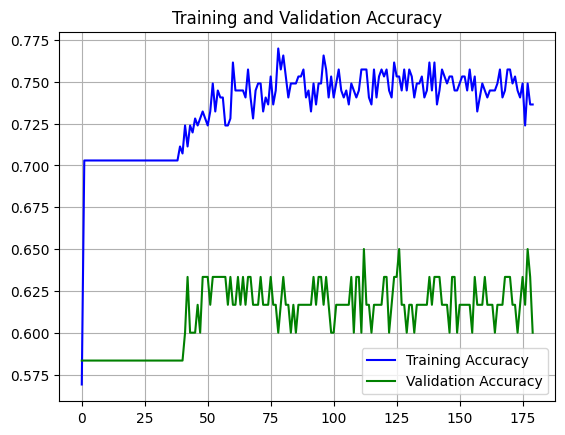

<Figure size 640x480 with 0 Axes>

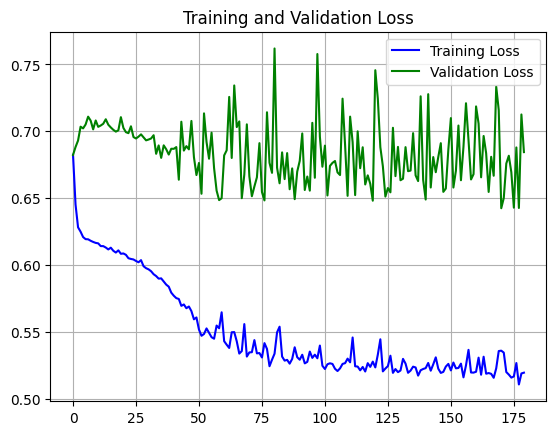

In [ ]:
from matplotlib import pyplot as plt
epochs = range(len(train_acc3)) # Changed to train_acc3 to match data length
plt.plot(epochs, train_acc3, 'b', label='Training Accuracy')
plt.plot(epochs, val_acc3, 'g', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.grid()
plt.legend()
plt.figure()
plt.show()

plt.plot(epochs, train_loss3, 'b', label='Training Loss')
plt.plot(epochs, val_loss3, 'g', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.grid()
plt.legend()
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
rf_accuracy = accuracy_score(y_test, y_pred_rf)
print(f'Random Forest Accuracy: {rf_accuracy}')

Random Forest Accuracy: 0.75


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
rf_accuracy = accuracy_score(y_test, y_pred_rf)
print(f'Random Forest Accuracy: {rf_accuracy}')

keras_accuracy = model.evaluate(X_test2, y_test)[1]
print(f'Keras Functional Model Accuracy: {keras_accuracy}')

accuracies = {
    'Random Forest': rf_accuracy,
    'Keras Functional Model': keras_accuracy
}

print("Model Accuracies:")
for model_name, accuracy in accuracies.items():
    print(f"{model_name}: {accuracy}")

Random Forest Accuracy: 0.75
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - accuracy: 0.6083 - loss: 0.6858
Keras Functional Model Accuracy: 0.6000000238418579
Model Accuracies:
Random Forest: 0.75
Keras Functional Model: 0.6000000238418579


In [ ]:
from sklearn.metrics import classification_report

y_pred_nn = (model.predict(X_test2) > 0.5).astype(int)
print("Neural Network:")
print(classification_report(y_test, y_pred_nn))

# Random Forest
print("Random Forest:")
print(classification_report(y_test, y_pred_rf))

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 544ms/step
Neural Network:
              precision    recall  f1-score   support

           0       0.60      0.91      0.73        35
           1       0.57      0.16      0.25        25

    accuracy                           0.60        60
   macro avg       0.59      0.54      0.49        60
weighted avg       0.59      0.60      0.53        60

Random Forest:
              precision    recall  f1-score   support

           0       0.72      0.94      0.81        35
           1       0.86      0.48      0.62        25

    accuracy                           0.75        60
   macro avg       0.79      0.71      0.72        60
weighted avg       0.78      0.75      0.73        60



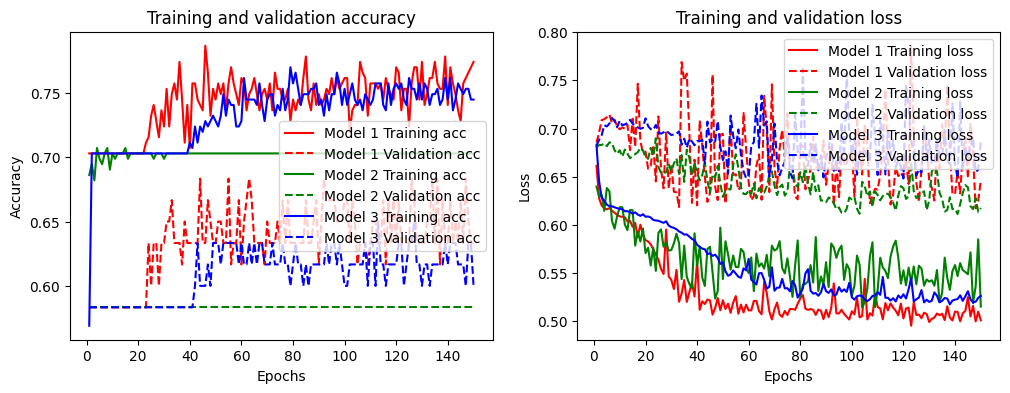

In [ ]:
import matplotlib.pyplot as plt


min_epochs = min(len(train_acc), len(train_acc2), len(train_acc3))
epochs = range(1, min_epochs + 1)

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(epochs, train_acc[:min_epochs], 'r', label='Model 1 Training acc')
plt.plot(epochs, val_acc[:min_epochs], 'r--', label='Model 1 Validation acc')
plt.plot(epochs, train_acc2[:min_epochs], 'g', label='Model 2 Training acc')
plt.plot(epochs, val_acc2[:min_epochs], 'g--', label='Model 2 Validation acc')
plt.plot(epochs, train_acc3[:min_epochs], 'b', label='Model 3 Training acc')
plt.plot(epochs, val_acc3[:min_epochs], 'b--', label='Model 3 Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, train_loss[:min_epochs], 'r', label='Model 1 Training loss')
plt.plot(epochs, val_loss[:min_epochs], 'r--', label='Model 1 Validation loss')
plt.plot(epochs, train_loss2[:min_epochs], 'g', label='Model 2 Training loss')
plt.plot(epochs, val_loss2[:min_epochs], 'g--', label='Model 2 Validation loss')
plt.plot(epochs, train_loss3[:min_epochs], 'b', label='Model 3 Training loss')
plt.plot(epochs, val_loss3[:min_epochs], 'b--', label='Model 3 Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

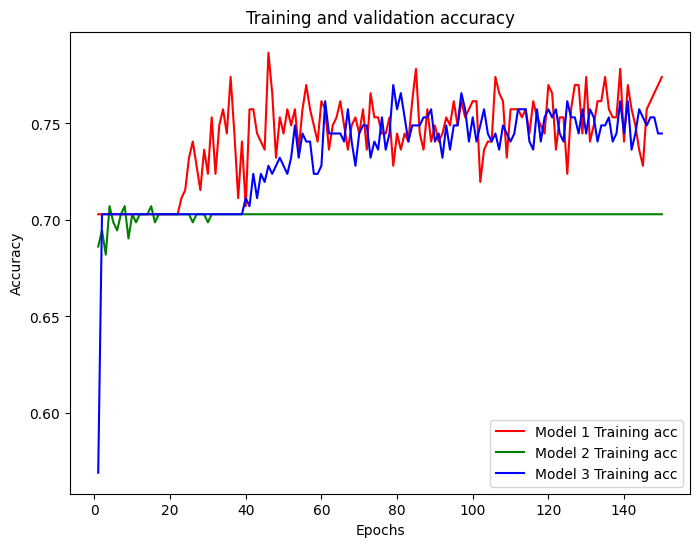

In [ ]:
import matplotlib.pyplot as plt

min_epochs = min(len(train_acc), len(train_acc2), len(train_acc3))
epochs = range(1, min_epochs + 1)

plt.figure(figsize=(8, 6))

# Plotting Accuracy
plt.plot(epochs, train_acc[:min_epochs], 'r', label='Model 1 Training acc')
plt.plot(epochs, train_acc2[:min_epochs], 'g', label='Model 2 Training acc')
plt.plot(epochs, train_acc3[:min_epochs], 'b', label='Model 3 Training acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

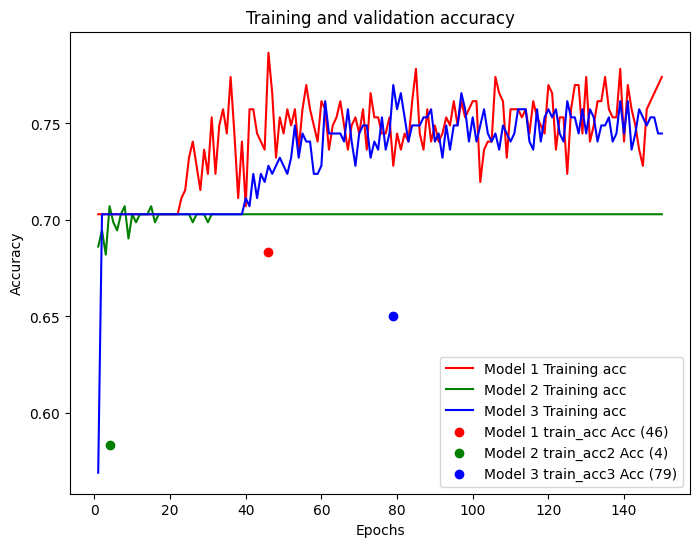

In [ ]:
import matplotlib.pyplot as plt


min_epochs = min(len(train_acc), len(train_acc2), len(train_acc3))
epochs = range(1, min_epochs + 1)

plt.figure(figsize=(8, 6))

plt.plot(epochs, train_acc[:min_epochs], 'r', label='Model 1 Training acc')
plt.plot(epochs, train_acc2[:min_epochs], 'g', label='Model 2 Training acc')
plt.plot(epochs, train_acc3[:min_epochs], 'b', label='Model 3 Training acc')

train_acc_epoch = train_acc.index(max(train_acc)) + 1
train_acc2_epoch = train_acc2.index(max(train_acc2)) + 1
train_acc3_epoch = train_acc3.index(max(train_acc3)) + 1

plt.scatter(train_acc_epoch, max(val_acc), color='r', marker='o', label=f'Model 1 train_acc Acc ({train_acc_epoch})')
plt.scatter(train_acc2_epoch, max(val_acc2), color='g', marker='o', label=f'Model 2 train_acc2 Acc ({train_acc2_epoch})')
plt.scatter(train_acc3_epoch, max(val_acc3), color='b', marker='o', label=f'Model 3 train_acc3 Acc ({train_acc3_epoch})')

plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()